# DATA PREPARATION

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
df = pd.read_csv('test_model_fixed_disbalance.csv', encoding='utf-16')

In [3]:
features = ['Distance', 'Equality', 'M1ContainsM2', 'M2ContainsM1', 'RelativeDistance', 'AntecLongerThree', 'AnaphLongerThree', 'SameAnimation',
            'SameGender', 'SameLemma', 'SameNumber', 'LemmasEquality', 'AntecIsNoun', 'AnaphIsNoun', 'AntecIsPro', 'AntecIsName', 'AnaphIsName',
            'AnaphIsPro', 'AnaphIsNumb', 'AntecIsNumb', 'AntecIsOrgn', 'AnaphIsOrgn', 'AnaphIsGeox', 'AntecIsGeox', 'AnaphIsAdj', 'AntecIsAdj']
target = 'SameGroup'

X = df.loc[:, features]
y = df.loc[:, target]

In [4]:
bestfeatures = SelectKBest(score_func=chi2, k=26)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [5]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [6]:
print(featureScores.nlargest(26,'Score'))

               Specs         Score
0           Distance  1.901847e+06
11    LemmasEquality  4.646029e+04
9          SameLemma  4.325535e+04
1           Equality  2.678519e+04
2       M1ContainsM2  2.327160e+04
3       M2ContainsM1  2.274161e+04
8         SameGender  5.524458e+03
10        SameNumber  2.431472e+03
7      SameAnimation  1.451671e+03
15       AntecIsName  1.300787e+03
17        AnaphIsPro  1.181980e+03
14        AntecIsPro  8.987533e+02
6   AnaphLongerThree  8.532848e+02
16       AnaphIsName  6.114087e+02
25        AntecIsAdj  6.039643e+02
24        AnaphIsAdj  4.939079e+02
5   AntecLongerThree  3.029756e+02
4   RelativeDistance  9.618438e+01
13       AnaphIsNoun  6.748859e+01
19       AntecIsNumb  4.431069e+01
18       AnaphIsNumb  2.035667e+01
12       AntecIsNoun  1.963128e+01
22       AnaphIsGeox  1.882583e+01
23       AntecIsGeox  3.806812e+00
21       AnaphIsOrgn  2.301261e+00
20       AntecIsOrgn  3.572595e-04


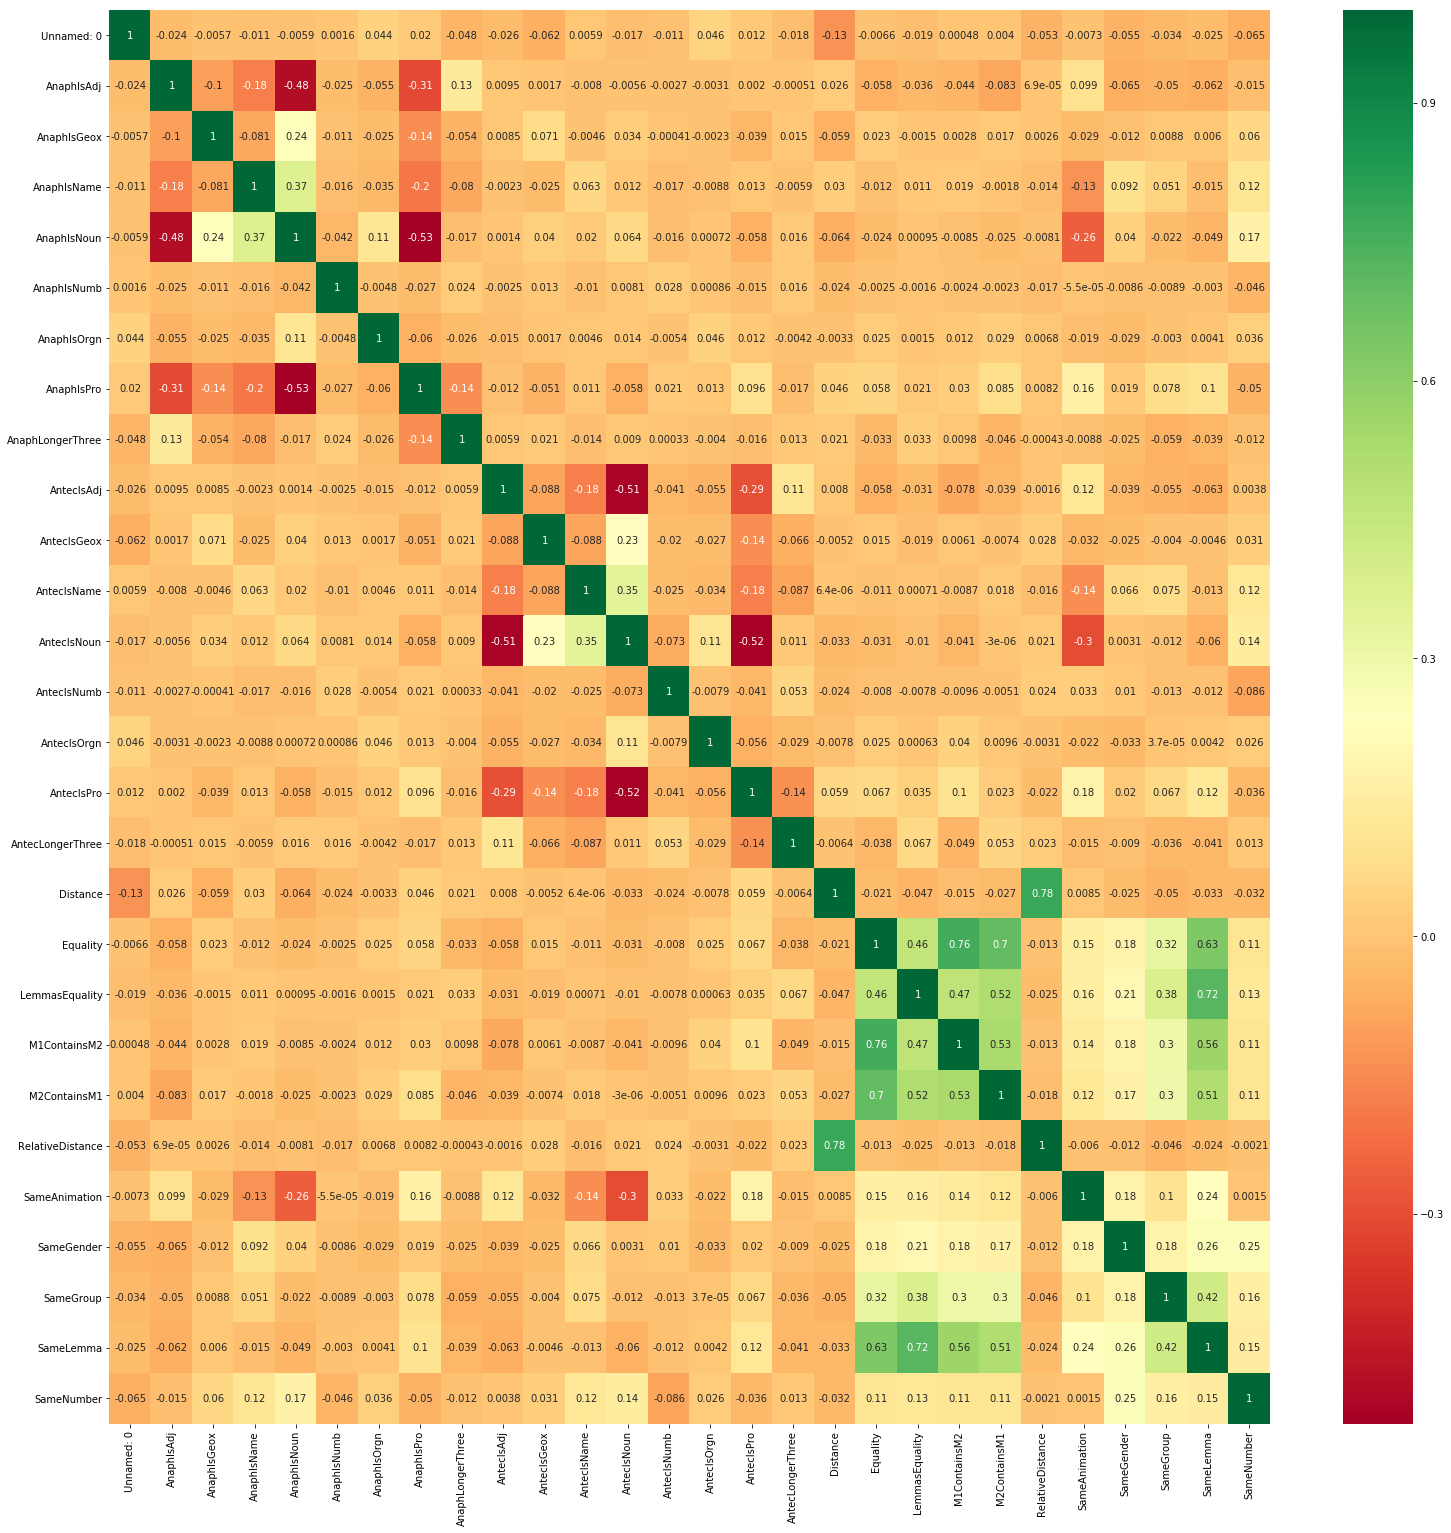

In [34]:
import matplotlib.pyplot as plt
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(26,26))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
# Split the data set and create two data sets.
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=143)
print("Number of training records: " + str(X_train.shape[0]))
print("Number of testing records : " + str(X_test.shape[0]))

Number of training records: 206807
Number of testing records : 51702


# CLASSIFICATION MODEL

In [8]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

## Model with Default Parameters

In [9]:
model = XGBClassifier()

In [10]:
X_test.head()

,Distance,Equality,M1ContainsM2,M2ContainsM1,RelativeDistance,AntecLongerThree,AnaphLongerThree,SameAnimation,SameGender,SameLemma,...,AnaphIsName,AnaphIsPro,AnaphIsNumb,AntecIsNumb,AntecIsOrgn,AnaphIsOrgn,AnaphIsGeox,AntecIsGeox,AnaphIsAdj,AntecIsAdj
58610,5413,0,0,0,0.439082,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
219740,10065,0,0,0,0.780596,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
79733,682,0,0,0,0.055321,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
251920,4396,0,0,0,0.629078,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
84383,1098,0,0,0,0.126134,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Train and evaluate.
model.fit(X_train, y_train,
          eval_metric=['error'],
          eval_set=[((X_train, y_train)),(X_test, y_test)],
          early_stopping_rounds=50,
          verbose=False)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [12]:
from matplotlib import pyplot

%matplotlib inline

Text(0.5,0,'Number of iterations')

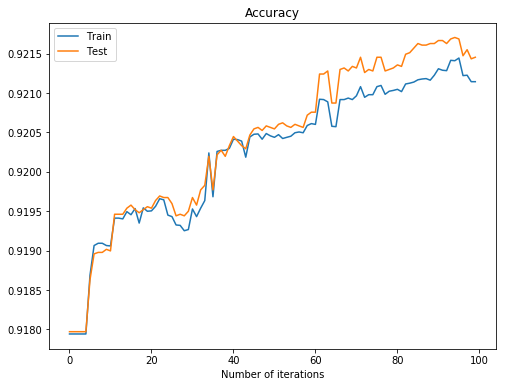

In [13]:
# Plot and display the performance evaluation
xgb_eval = model.evals_result()
eval_steps = range(len(xgb_eval['validation_0']['error']))

fig, ax = pyplot.subplots(1, 1, sharex=True, figsize=(8, 6))

ax.plot(eval_steps, [1-x for x in xgb_eval['validation_0']['error']], label='Train')
ax.plot(eval_steps, [1-x for x in xgb_eval['validation_1']['error']], label='Test')
ax.legend()
ax.set_title('Accuracy')
ax.set_xlabel('Number of iterations')

In [14]:

print("Model best validation score :", model.best_score)
print("Model best number of tree limit :", model.best_ntree_limit)

Model best validation score : 0.078295
Model best number of tree limit : 95


In [15]:
# Check the accuracy of the trained model.
n_trees = 95
y_pred = model.predict(X_test, ntree_limit= n_trees)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: %.1f%%" % (accuracy * 100.0))
print("Presicion: %.1f%%" % (precision * 100.0))
print("Recall: %.1f%%" % (recall * 100.0))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 92.2%
Presicion: 75.1%
Recall: 31.6%
             precision    recall  f1-score   support

    class 0       0.93      0.99      0.96     46568
    class 1       0.75      0.32      0.45      5134

avg / total       0.91      0.92      0.91     51702



C:\Users\julia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


NameError: name 'plt' is not defined

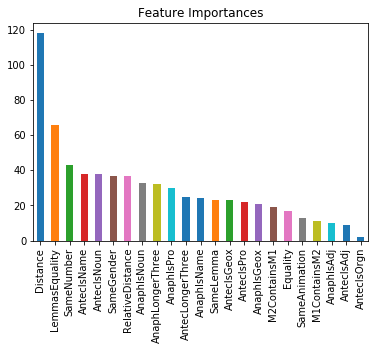

In [16]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

## Parameters Tuning

### max_depth and min_child_weight

In [17]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
model1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=95,
        max_depth=3,
        min_child_weight=1,
        gamma=0,
        subsample=1,
        colsample_bytree=1,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    )
gsearch1 = GridSearchCV(estimator = model1, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)
pd.DataFrame(gsearch1.cv_results_, columns=['mean_fit_time', 'params', 'mean_train_score', 'mean_test_score'])

,mean_fit_time,params,mean_train_score,mean_test_score
0,97.489536,"{'max_depth': 3, 'min_child_weight': 1}",0.922065,0.918220
1,106.802243,"{'max_depth': 3, 'min_child_weight': 3}",0.922018,0.918169
2,110.192554,"{'max_depth': 3, 'min_child_weight': 5}",0.922075,0.918088
3,183.949453,"{'max_depth': 5, 'min_child_weight': 1}",0.925402,0.917767
4,210.990038,"{'max_depth': 5, 'min_child_weight': 3}",0.925410,0.917411
5,186.225017,"{'max_depth': 5, 'min_child_weight': 5}",0.925258,0.917233
6,255.322828,"{'max_depth': 7, 'min_child_weight': 1}",0.928467,0.916796
7,246.955965,"{'max_depth': 7, 'min_child_weight': 3}",0.928118,0.917477
8,236.033392,"{'max_depth': 7, 'min_child_weight': 5}",0.928057,0.916784
9,329.069960,"{'max_depth': 9, 'min_child_weight': 1}",0.932870,0.914928


In [18]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.9182195133047178)

### gamma

In [19]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
model2 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=95,
        max_depth=3,
        min_child_weight=1,
        gamma=0,
        subsample=1,
        colsample_bytree=1,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    )
gsearch2 = GridSearchCV(estimator = model2, param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X,y)
pd.DataFrame(gsearch2.cv_results_, columns=['mean_fit_time', 'params', 'mean_train_score', 'mean_test_score'])

,mean_fit_time,params,mean_train_score,mean_test_score
0,98.948085,{'gamma': 0.0},0.922065,0.918220
1,109.005790,{'gamma': 0.1},0.922065,0.918220
2,115.125470,{'gamma': 0.2},0.922059,0.918165
3,118.161716,{'gamma': 0.3},0.922059,0.918165
4,93.280374,{'gamma': 0.4},0.922059,0.918165


In [20]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.9182195133047178)

### subsample and colsample_bytree

In [21]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
model3 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=95,
        max_depth=3,
        min_child_weight=1,
        gamma=0.0,
        subsample=1,
        colsample_bytree=1,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    )
gsearch3 = GridSearchCV(estimator = model3, param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,y)
pd.DataFrame(gsearch3.cv_results_, columns=['mean_fit_time', 'params', 'mean_train_score', 'mean_test_score'])

,mean_fit_time,params,mean_train_score,mean_test_score
0,79.004241,"{'colsample_bytree': 0.6, 'subsample': 0.6}",0.921809,0.917848
1,89.248408,"{'colsample_bytree': 0.6, 'subsample': 0.7}",0.921752,0.917895
2,106.444191,"{'colsample_bytree': 0.6, 'subsample': 0.8}",0.921764,0.918250
3,118.626202,"{'colsample_bytree': 0.6, 'subsample': 0.9}",0.921729,0.918084
4,140.967270,"{'colsample_bytree': 0.7, 'subsample': 0.6}",0.921802,0.917786
5,119.818263,"{'colsample_bytree': 0.7, 'subsample': 0.7}",0.921801,0.917535
6,103.541284,"{'colsample_bytree': 0.7, 'subsample': 0.8}",0.921751,0.917806
7,97.809639,"{'colsample_bytree': 0.7, 'subsample': 0.9}",0.921852,0.917794
8,110.790624,"{'colsample_bytree': 0.8, 'subsample': 0.6}",0.921809,0.917662
9,109.250599,"{'colsample_bytree': 0.8, 'subsample': 0.7}",0.921962,0.917024


In [22]:
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.8}, 0.9182504589853344)

## Model with Tuned Parameters

In [23]:
model_final = XGBClassifier(
        learning_rate =0.1, # reduce learning rate
        n_estimators=220, # add more trees
        max_depth=3,
        min_child_weight=1,
        gamma=0.0,
        subsample=0.8,
        colsample_bytree=0.6,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    )

In [24]:
model_final.fit(X_train, y_train,
                eval_metric=['error'],
                eval_set=[((X_train, y_train)),(X_test, y_test)],
                early_stopping_rounds=50,
                verbose=False)

print("Model best validation score :", model_final.best_score)
print("Model best number of tree limit :", model_final.best_ntree_limit)

Model best validation score : 0.077328
Model best number of tree limit : 220


In [25]:
df = pd.read_csv('test_model.csv', encoding='utf-16')

In [26]:
features = ['Distance', 'Equality', 'M1ContainsM2', 'M2ContainsM1', 'RelativeDistance', 'AntecLongerThree', 'AnaphLongerThree', 'SameAnimation',
            'SameGender', 'SameLemma', 'SameNumber', 'LemmasEquality', 'AntecIsNoun', 'AnaphIsNoun', 'AntecIsPro', 'AntecIsName', 'AnaphIsName',
            'AnaphIsPro', 'AnaphIsNumb', 'AntecIsNumb', 'AntecIsOrgn', 'AnaphIsOrgn', 'AnaphIsGeox', 'AntecIsGeox', 'AnaphIsAdj', 'AntecIsAdj']

X = df.loc[:, features]

In [27]:
n_trees = 220
y_pred = model_final.predict(X, ntree_limit= n_trees)

C:\Users\julia\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [28]:
df['PredictionResult'] = y_pred
df.to_csv('classifier-output_fin4.csv', index=False, encoding='utf-16')
df.head()

,Unnamed: 0,AnaphIsAdj,AnaphIsGeox,AnaphIsName,AnaphIsNoun,AnaphIsNumb,AnaphIsOrgn,AnaphIsPro,AnaphLongerThree,AntecIsAdj,...,Mention1Id,Mention2,Mention2Id,RelativeDistance,SameAnimation,SameGender,SameGroup,SameLemma,SameNumber,PredictionResult
0,0,0,0,0,1,0,0,0,0,0,...,"(0, 6)",Город Филадельфия,"(8, 17)",0.007353,0,0,1,0,0,0
1,1,0,0,1,1,0,0,0,0,0,...,"(0, 6)",Фили,"(87, 4)",0.297794,0,0,1,0,0,0
2,2,0,0,0,0,0,0,1,0,0,...,"(0, 6)",она,"(154, 3)",0.544118,1,0,1,0,0,0
3,3,0,0,1,1,0,0,0,0,0,...,"(8, 17)",Фили,"(87, 4)",0.227941,0,1,1,0,1,0
4,4,0,0,0,0,0,0,1,0,0,...,"(8, 17)",она,"(154, 3)",0.474265,0,0,1,0,1,0


In [29]:
import pickle

pickle.dump(model_final, open('classifier_final.pickle.dat', 'wb'))

# loaded_model = pickle.load(open('classifier.pickle.dat', 'rb'))